 **1. Perkenalan Dataset**





Dataset Titanic adalah dataset klasik yang sering digunakan dalam pembelajaran supervised learning, khususnya klasifikasi. Tujuannya adalah untuk memprediksi apakah seorang penumpang selamat (`Survived=1`) atau tidak (`Survived=0`) berdasarkan fitur seperti usia, jenis kelamin, kelas penumpang, dll.

Dataset terdiri dari 891 data pelatihan (`train.csv`) dengan beberapa kolom penting:
- `Pclass`: Kelas tiket penumpang (1 = First, 2 = Second, 3 = Third)
- `Sex`: Jenis kelamin
- `Age`: Umur penumpang
- `SibSp`: Jumlah saudara/keluarga yang ikut
- `Parch`: Jumlah orang tua/anak yang ikut
- `Fare`: Harga tiket
- `Survived`: Label target (0 = Tidak selamat, 1 = Selamat)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Import library utama
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Optional untuk styling
sns.set(style="whitegrid")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('train.csv')
# Lihat 5 baris awal
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


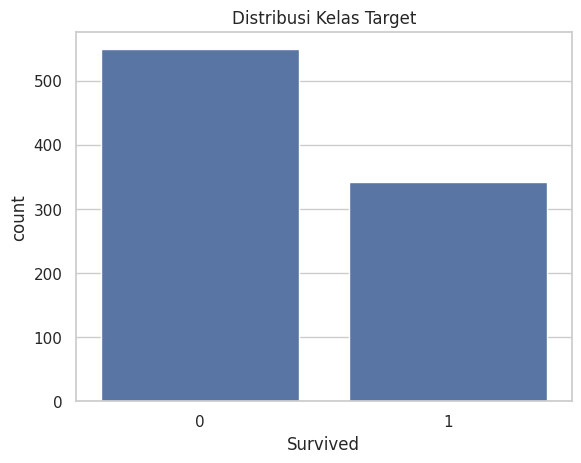

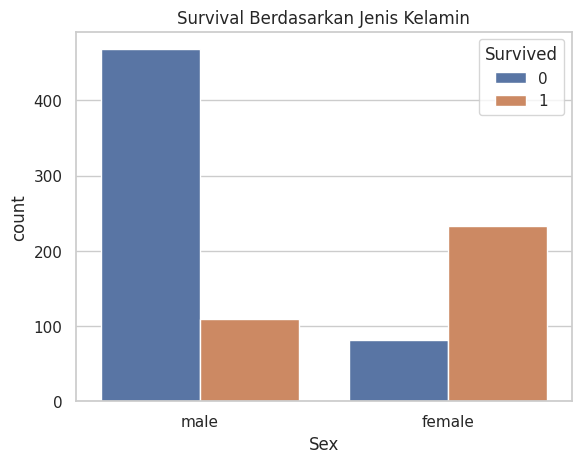

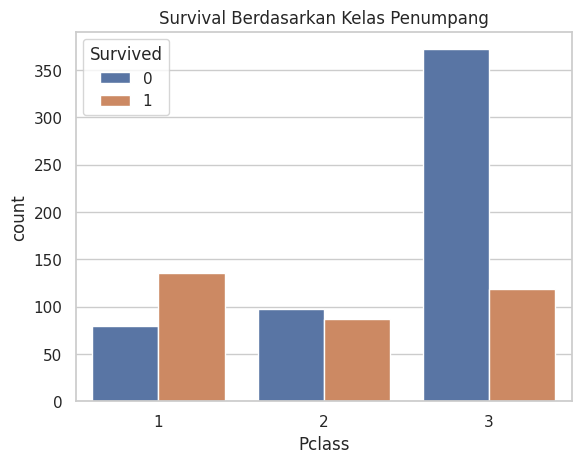

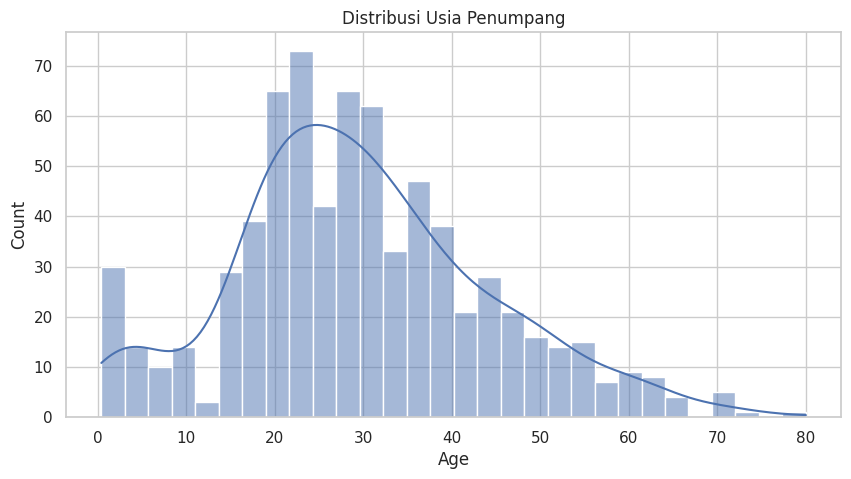

In [3]:
# Informasi umum
df.info()

# Cek jumlah missing values
df.isnull().sum()

# Statistik deskriptif
df.describe()

# Distribusi target (Survived)
sns.countplot(x='Survived', data=df)
plt.title('Distribusi Kelas Target')
plt.show()

# Distribusi jenis kelamin dan peluang selamat
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Berdasarkan Jenis Kelamin')
plt.show()

# Survival berdasarkan Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Berdasarkan Kelas Penumpang')
plt.show()

# Age distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribusi Usia Penumpang')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
# Cek ulang missing value
df.isnull().sum()

# Tangani missing value
df['Age'].fillna(df['Age'].median(), inplace=True)  # Imputasi median
df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)  # Kolom tidak terlalu relevan

# Encode kolom kategorikal
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Cek data setelah preprocessing
df.head()

<ipython-input-4-1912863716>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Imputasi median


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [6]:
# Simpan data yang sudah dipreprocess
df.to_csv('train_clean.csv', index=False)
print("Data preprocessing selesai dan disimpan ke train_clean.csv")

Data preprocessing selesai dan disimpan ke train_clean.csv
